In [163]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV, ElasticNet,ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import pickle

In [165]:
df= pd.read_csv("D:\Study\Data Science\Python\ineuron\Data_Set\Admission_Prediction.csv")
df.head(2)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1      337.0        118.0                4.0  4.5  4.5  9.65   
1           2      324.0        107.0                4.0  4.0  4.5  8.87   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76

# EDA on Dataset

In [166]:
df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  485.000000   490.000000         485.000000  500.000000   
mean   250.500000  316.558763   107.187755           3.121649    3.374000   
std    144.481833   11.274704     6.112899           1.146160    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

             LOR        CGPA    Research  Chance of Admit  
count  500.00000  500.000000  500.000000        500.00000  
mean     3.48400    8.576440    0.560000          0.72174  
std      0.92545    0.604813    0.496884          0.14114  
min      1.00000    6.800000    0.000000          0.34000  
25%      3.00000    8.127500    0.000000          0.63000  
50%      3.50000    8.560000    1.000000          0.72000  
75%      4.00000    9.040000    1.000000          0.82000  
max      5.00000    9.920000    1.000000          0.97000

In [167]:
# Getting information about each Features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [168]:
#save the Group By output in a dataset which will be used for plotting the graphs
ratings= df.groupby(['GRE Score', 'TOEFL Score', 'University Rating']).size().reset_index().rename(columns={0:'Rating_Count'} )
ratings.head(4)

GRE Score  TOEFL Score  University Rating  Rating_Count
0      290.0        100.0                1.0             1
1      290.0        104.0                4.0             1
2      293.0         97.0                2.0             1
3      294.0         93.0                1.0             1

<AxesSubplot:xlabel='GRE Score', ylabel='Rating_Count'>

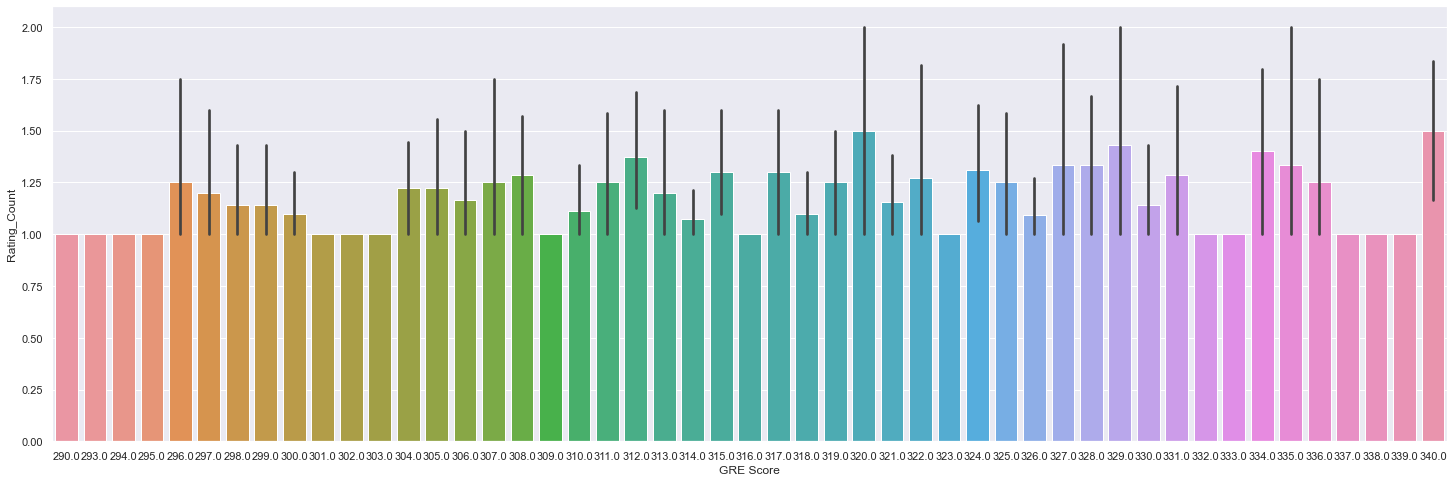

In [169]:
#Plotting Graph based on Rating Count and Aggregate Rating
sns.set(rc = {'figure.figsize':(25,8)})
sns.barplot(x="GRE Score", y="Rating_Count", data=ratings,)

In [170]:
# Override default pandas configuration
pd.options.display.width = 0
pd.options.display.max_rows = 10000
pd.options.display.max_info_columns = 10000

# #Create a profile report
a = ProfileReport(df)
#
# #this will create a report in html format in the folder where project resides
a.to_file('admission_profile_test.html')

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [171]:
#To print list of all Gre Score which has duplicate values
df[df['GRE Score'].duplicated()].head(2)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
12          13        NaN        112.0                4.0  4.0  4.5   9.1   
15          16      314.0        105.0                3.0  3.5  2.5   8.3   

    Research  Chance of Admit  
12         1             0.78  
15         0             0.54

# Finding Null Values  in Features and Replacing it with Mean values

In [172]:
#Null Values in the dataset
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [173]:
#another way of finding specific columns which has null values

list_null_features= []

for features in df.columns:
    if df[features].isnull().sum()>0:
        list_null_features.append(features)   
        
print(list_null_features)

['GRE Score', 'TOEFL Score', 'University Rating']


<AxesSubplot:>

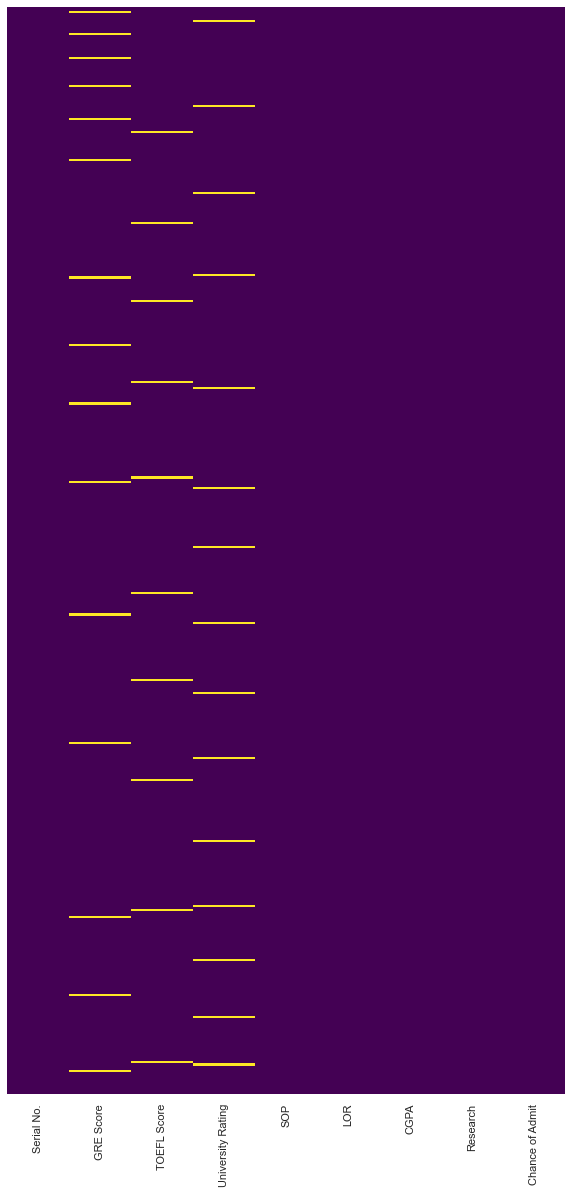

In [174]:
#Using heatmap to plot missing values
sns.set(rc = {'figure.figsize':(10,20)})
sns.heatmap(df.isnull(),yticklabels=False,cbar= False,cmap = 'viridis')

In [175]:
#To print list of all Gre Score which has NAN values in it
df[df['GRE Score'].isnull()]

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
2             3        NaN        104.0                3.0  3.0  3.5  8.00   
12           13        NaN        112.0                4.0  4.0  4.5  9.10   
23           24        NaN        119.0                5.0  5.0  4.5  9.70   
36           37        NaN        106.0                2.0  4.0  4.0  8.40   
51           52        NaN        100.0                2.0  1.5  3.5  7.90   
70           71        NaN        118.0                5.0  5.0  5.0  9.64   
124         125        NaN        106.0                4.0  2.5  3.0  8.47   
155         156        NaN        109.0                3.0  3.0  3.0  8.69   
182         183        NaN        100.0                2.0  3.0  3.5  7.88   
218         219        NaN        110.0                4.0  3.0  3.5  8.97   
279         280        NaN        102.0                2.0  3.0  4.0  8.73   
338         339        NaN        108.0                5.0  4.0  4.0  8.74   
418         419        NaN        111.0                2.0  2.5  4.0  8.03   
454         455        NaN        105.0                2.0  3.0  3.5  8.01   
489         490        NaN        110.0                3.0  4.0  4.5  8.50   

     Research  Chance of Admit  
2           1             0.72  
12          1             0.78  
23          1             0.95  
36          0             0.64  
51          1             0.56  
70          1             0.94  
124         0             0.57  
155         0             0.77  
182         0             0.68  
218         1             0.84  
279         0             0.67  
338         1             0.81  
418         0             0.60  
454         0             0.71  
489         0             0.65

In [176]:
# Get the mean of GRE Score
round(df['GRE Score'].mean(),2)

316.56

In [177]:
# Replace NAN values of GRE Score with Mean values of GRE

df['GRE Score']=  df['GRE Score'].fillna(round(df['GRE Score'].mean(),2))
df.head(5)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1     337.00        118.0                4.0  4.5  4.5  9.65   
1           2     324.00        107.0                4.0  4.0  4.5  8.87   
2           3     316.56        104.0                3.0  3.0  3.5  8.00   
3           4     322.00        110.0                3.0  3.5  2.5  8.67   
4           5     314.00        103.0                2.0  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65

In [178]:
#To check if any Gre Scores are there with NAN values in it after the replacement
df[df['GRE Score'].isnull()]

Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, Chance of Admit]
Index: []

In [179]:
#To check all TOEFL Scores with NAN values in it
df[df['TOEFL Score'].isnull()]

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
57           58      298.0          NaN                2.0  4.0  2.0  7.60   
99          100      323.0          NaN                3.0  4.0  4.0  8.88   
135         136      314.0          NaN                4.0  3.5  4.0  8.77   
172         173      322.0          NaN                4.0  4.0  5.0  9.13   
216         217      322.0          NaN                4.0  4.5  4.5  9.26   
269         270      308.0          NaN                4.0  4.5  5.0  8.34   
309         310      308.0          NaN                4.0  3.5  3.0  8.60   
355         356      317.0          NaN                2.0  2.0  3.5  8.12   
415         416      327.0          NaN                4.0  4.0  4.5  8.75   
485         486      311.0          NaN                2.0  2.5  3.5  8.34   

     Research  Chance of Admit  
57          0             0.46  
99          1             0.79  
135         1             0.82  
172         1             0.86  
216         1             0.91  
269         0             0.77  
309         0             0.70  
355         0             0.73  
415         1             0.76  
485         1             0.70

In [180]:
# Replace NAN values of GRE Score with Mean values of GRE
df['TOEFL Score']=  df['TOEFL Score'].fillna(round(df['TOEFL Score'].mean(),2))
df

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0             1     337.00       118.00                4.0  4.5  4.5  9.65   
1             2     324.00       107.00                4.0  4.0  4.5  8.87   
2             3     316.56       104.00                3.0  3.0  3.5  8.00   
3             4     322.00       110.00                3.0  3.5  2.5  8.67   
4             5     314.00       103.00                2.0  2.0  3.0  8.21   
5             6     330.00       115.00                5.0  4.5  3.0  9.34   
6             7     321.00       109.00                NaN  3.0  4.0  8.20   
7             8     308.00       101.00                2.0  3.0  4.0  7.90   
8             9     302.00       102.00                1.0  2.0  1.5  8.00   
9            10     323.00       108.00                3.0  3.5  3.0  8.60   
10           11     325.00       106.00                3.0  3.5  4.0  8.40   
11           12     327.00       111.00                4.0  4.0  4.5  9.00   
12           13     316.56       112.00                4.0  4.0  4.5  9.10   
13           14     307.00       109.00                3.0  4.0  3.0  8.00   
14           15     311.00       104.00                3.0  3.5  2.0  8.20   
15           16     314.00       105.00                3.0  3.5  2.5  8.30   
16           17     317.00       107.00                3.0  4.0  3.0  8.70   
17           18     319.00       106.00                3.0  4.0  3.0  8.00   
18           19     318.00       110.00                3.0  4.0  3.0  8.80   
19           20     303.00       102.00                3.0  3.5  3.0  8.50   
20           21     312.00       107.00                3.0  3.0  2.0  7.90   
21           22     325.00       114.00                4.0  3.0  2.0  8.40   
22           23     328.00       116.00                5.0  5.0  5.0  9.50   
23           24     316.56       119.00                5.0  5.0  4.5  9.70   
24           25     336.00       119.00                5.0  4.0  3.5  9.80   
25           26     340.00       120.00                5.0  4.5  4.5  9.60   
26           27     322.00       109.00                5.0  4.5  3.5  8.80   
27           28     298.00        98.00                2.0  1.5  2.5  7.50   
28           29     295.00        93.00                1.0  2.0  2.0  7.20   
29           30     310.00        99.00                2.0  1.5  2.0  7.30   
30           31     300.00        97.00                2.0  3.0  3.0  8.10   
31           32     327.00       103.00                3.0  4.0  4.0  8.30   
32           33     338.00       118.00                4.0  3.0  4.5  9.40   
33           34     340.00       114.00                5.0  4.0  4.0  9.60   
34           35     331.00       112.00                5.0  4.0  5.0  9.80   
35           36     320.00       110.00                5.0  5.0  5.0  9.20   
36           37     316.56       106.00                2.0  4.0  4.0  8.40   
37           38     300.00       105.00                1.0  1.0  2.0  7.80   
38           39     304.00       105.00                1.0  3.0  1.5  7.50   
39           40     307.00       108.00                2.0  4.0  3.5  7.70   
40           41     308.00       110.00                3.0  3.5  3.0  8.00   
41           42     316.00       105.00                2.0  2.5  2.5  8.20   
42           43     313.00       107.00                2.0  2.5  2.0  8.50   
43           44     332.00       117.00                4.0  4.5  4.0  9.10   
44           45     326.00       113.00                5.0  4.5  4.0  9.40   
45           46     322.00       110.00                NaN  5.0  4.0  9.10   
46           47     329.00       114.00                5.0  4.0  5.0  9.30   
47           48     339.00       119.00                5.0  4.5  4.0  9.70   
48           49     321.00       110.00                3.0  3.5  5.0  8.85   
49           50     327.00       111.00                4.0  3.0  4.0  8.40   
50           51     313.00 

In [181]:
#To check if we have any TOEFL Scores with NAN values in it after the replacement
df[df['TOEFL Score'].isnull()]

Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, Chance of Admit]
Index: []

In [182]:
#To check all University Rating with NAN values in it
df[df['University Rating'].isnull()]

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
6             7      321.0        109.0                NaN  3.0  4.0  8.20   
45           46      322.0        110.0                NaN  5.0  4.0  9.10   
85           86      319.0        103.0                NaN  4.5  3.5  8.66   
123         124      308.0        108.0                NaN  3.5  3.5  8.22   
175         176      320.0        111.0                NaN  4.5  3.5  8.87   
221         222      316.0        110.0                NaN  3.5  4.0  8.56   
248         249      324.0        110.0                NaN  3.5  4.0  8.87   
283         284      321.0        111.0                NaN  2.5  3.0  8.90   
315         316      308.0        104.0                NaN  2.5  3.0  8.07   
345         346      316.0         98.0                NaN  1.5  2.0  7.43   
383         384      300.0        100.0                NaN  3.0  3.5  8.26   
413         414      317.0        101.0                NaN  3.0  2.0  7.94   
438         439      318.0        110.0                NaN  2.5  3.5  8.54   
464         465      298.0         97.0                NaN  2.0  3.0  7.21   
486         487      319.0        102.0                NaN  2.5  2.5  8.37   

     Research  Chance of Admit  
6           1             0.75  
45          1             0.88  
85          0             0.76  
123         0             0.61  
175         1             0.85  
221         0             0.75  
248         1             0.80  
283         1             0.80  
315         0             0.65  
345         0             0.49  
383         0             0.62  
413         1             0.49  
438         1             0.67  
464         0             0.45  
486         0             0.68

In [183]:
df['University Rating']=  df['University Rating'].fillna(round(df['University Rating'].mean(),2))
df

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0             1     337.00       118.00               4.00  4.5  4.5  9.65   
1             2     324.00       107.00               4.00  4.0  4.5  8.87   
2             3     316.56       104.00               3.00  3.0  3.5  8.00   
3             4     322.00       110.00               3.00  3.5  2.5  8.67   
4             5     314.00       103.00               2.00  2.0  3.0  8.21   
5             6     330.00       115.00               5.00  4.5  3.0  9.34   
6             7     321.00       109.00               3.12  3.0  4.0  8.20   
7             8     308.00       101.00               2.00  3.0  4.0  7.90   
8             9     302.00       102.00               1.00  2.0  1.5  8.00   
9            10     323.00       108.00               3.00  3.5  3.0  8.60   
10           11     325.00       106.00               3.00  3.5  4.0  8.40   
11           12     327.00       111.00               4.00  4.0  4.5  9.00   
12           13     316.56       112.00               4.00  4.0  4.5  9.10   
13           14     307.00       109.00               3.00  4.0  3.0  8.00   
14           15     311.00       104.00               3.00  3.5  2.0  8.20   
15           16     314.00       105.00               3.00  3.5  2.5  8.30   
16           17     317.00       107.00               3.00  4.0  3.0  8.70   
17           18     319.00       106.00               3.00  4.0  3.0  8.00   
18           19     318.00       110.00               3.00  4.0  3.0  8.80   
19           20     303.00       102.00               3.00  3.5  3.0  8.50   
20           21     312.00       107.00               3.00  3.0  2.0  7.90   
21           22     325.00       114.00               4.00  3.0  2.0  8.40   
22           23     328.00       116.00               5.00  5.0  5.0  9.50   
23           24     316.56       119.00               5.00  5.0  4.5  9.70   
24           25     336.00       119.00               5.00  4.0  3.5  9.80   
25           26     340.00       120.00               5.00  4.5  4.5  9.60   
26           27     322.00       109.00               5.00  4.5  3.5  8.80   
27           28     298.00        98.00               2.00  1.5  2.5  7.50   
28           29     295.00        93.00               1.00  2.0  2.0  7.20   
29           30     310.00        99.00               2.00  1.5  2.0  7.30   
30           31     300.00        97.00               2.00  3.0  3.0  8.10   
31           32     327.00       103.00               3.00  4.0  4.0  8.30   
32           33     338.00       118.00               4.00  3.0  4.5  9.40   
33           34     340.00       114.00               5.00  4.0  4.0  9.60   
34           35     331.00       112.00               5.00  4.0  5.0  9.80   
35           36     320.00       110.00               5.00  5.0  5.0  9.20   
36           37     316.56       106.00               2.00  4.0  4.0  8.40   
37           38     300.00       105.00               1.00  1.0  2.0  7.80   
38           39     304.00       105.00               1.00  3.0  1.5  7.50   
39           40     307.00       108.00               2.00  4.0  3.5  7.70   
40           41     308.00       110.00               3.00  3.5  3.0  8.00   
41           42     316.00       105.00               2.00  2.5  2.5  8.20   
42           43     313.00       107.00               2.00  2.5  2.0  8.50   
43           44     332.00       117.00               4.00  4.5  4.0  9.10   
44           45     326.00       113.00               5.00  4.5  4.0  9.40   
45           46     322.00       110.00               3.12  5.0  4.0  9.10   
46           47     329.00       114.00               5.00  4.0  5.0  9.30   
47           48     339.00       119.00               5.00  4.5  4.0  9.70   
48           49     321.00       110.00               3.00  3.5  5.0  8.85   
49           50     327.00       111.00               4.00  3.0  4.0  8.40   
50           51     313.00 

In [184]:
#To check if we have any University Rating with NAN values in it
df[df['University Rating'].isnull()]

Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, Chance of Admit]
Index: []

# Dropping Unnecessary Features

In [185]:
# Since Serial Number is not required we will drop it
df.drop(['Serial No.'], axis= 1, inplace = True)

In [188]:
#dataset after dropping Serial no
df.head(2)

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0      337.0        118.0                4.0  4.5  4.5  9.65         1   
1      324.0        107.0                4.0  4.0  4.5  8.87         1   

   Chance of Admit  
0             0.92  
1             0.76

# Storing Features in X and Y dataframe

In [190]:
y = df['Chance of Admit']
y.head(5)

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [191]:
df_X = df
df_X.head(5)

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0     337.00        118.0                4.0  4.5  4.5  9.65         1   
1     324.00        107.0                4.0  4.0  4.5  8.87         1   
2     316.56        104.0                3.0  3.0  3.5  8.00         1   
3     322.00        110.0                3.0  3.5  2.5  8.67         1   
4     314.00        103.0                2.0  2.0  3.0  8.21         0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

In [192]:
#dropping Label column from dataframe  and storing it in x
df_X.drop(['Chance of Admit'], axis= 1, inplace = True)
x= df_X
x

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0       337.00       118.00               4.00  4.5  4.5  9.65         1
1       324.00       107.00               4.00  4.0  4.5  8.87         1
2       316.56       104.00               3.00  3.0  3.5  8.00         1
3       322.00       110.00               3.00  3.5  2.5  8.67         1
4       314.00       103.00               2.00  2.0  3.0  8.21         0
5       330.00       115.00               5.00  4.5  3.0  9.34         1
6       321.00       109.00               3.12  3.0  4.0  8.20         1
7       308.00       101.00               2.00  3.0  4.0  7.90         0
8       302.00       102.00               1.00  2.0  1.5  8.00         0
9       323.00       108.00               3.00  3.5  3.0  8.60         0
10      325.00       106.00               3.00  3.5  4.0  8.40         1
11      327.00       111.00               4.00  4.0  4.5  9.00         1
12      316.56       112.00               4.00  4.0  4.5  9.10         1
13      307.00       109.00               3.00  4.0  3.0  8.00         1
14      311.00       104.00               3.00  3.5  2.0  8.20         1
15      314.00       105.00               3.00  3.5  2.5  8.30         0
16      317.00       107.00               3.00  4.0  3.0  8.70         0
17      319.00       106.00               3.00  4.0  3.0  8.00         1
18      318.00       110.00               3.00  4.0  3.0  8.80         0
19      303.00       102.00               3.00  3.5  3.0  8.50         0
20      312.00       107.00               3.00  3.0  2.0  7.90         1
21      325.00       114.00               4.00  3.0  2.0  8.40         0
22      328.00       116.00               5.00  5.0  5.0  9.50         1
23      316.56       119.00               5.00  5.0  4.5  9.70         1
24      336.00       119.00               5.00  4.0  3.5  9.80         1
25      340.00       120.00               5.00  4.5  4.5  9.60         1
26      322.00       109.00               5.00  4.5  3.5  8.80         0
27      298.00        98.00               2.00  1.5  2.5  7.50         1
28      295.00        93.00               1.00  2.0  2.0  7.20         0
29      310.00        99.00               2.00  1.5  2.0  7.30         0
30      300.00        97.00               2.00  3.0  3.0  8.10         1
31      327.00       103.00               3.00  4.0  4.0  8.30         1
32      338.00       118.00               4.00  3.0  4.5  9.40         1
33      340.00       114.00               5.00  4.0  4.0  9.60         1
34      331.00       112.00               5.00  4.0  5.0  9.80         1
35      320.00       110.00               5.00  5.0  5.0  9.20         1
36      316.56       106.00               2.00  4.0  4.0  8.40         0
37      300.00       105.00               1.00  1.0  2.0  7.80         0
38      304.00       105.00               1.00  3.0  1.5  7.50         0
39      307.00       108.00               2.00  4.0  3.5  7.70         0
40      308.00       110.00               3.00  3.5  3.0  8.00         1
41      316.00       105.00               2.00  2.5  2.5  8.20         1
42      313.00       107.00               2.00  2.5  2.0  8.50         1
43      332.00       117.00               4.00  4.5  4.0  9.10         0
44      326.00       113.00               5.00  4.5  4.0  9.40         1
45      322.00       110.00               3.12  5.0  4.0  9.10         1
46      329.00       114.00               5.00  4.0  5.0  9.30         1
47      339.00       119.00               5.00  4.5  4.0  9.70         0
48      321.00       110.00               3.00  3.5  5.0  8.85         1
49      327.00       111.00               4.00  3.0  4.0  8.40         1
50      313.00        98.00               3.00  2.5  4.5  8.30         1
51      316.56       100.00               2.00  1.5  3.5  7.90         1
52      334.00       116.00               4.00  4.0  3.0  8.00         1
53      324.00       112.00               4.00  4.0  2.5  8.10 

# Feature Scaling

1. Since features like GRE and TOEFL scores has higher magnitude(values) compared to other Features and Label, its good idea to scale it down else our machine learning algorithm will face difficulty. 

2. To scale down or to perform Feature Scaling we will use the technique of Standard Scaler also called as Z-score Normalization where Mean = 0 and Standard Deviation = 1

3. Formula for standard scaler  z= (x-µ)/standard deviation.   where µ is Mean


In [193]:
#Create an instance of Standard Scaler
scaler = StandardScaler()

1. fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data.
2. The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.
3. Now, we want scaling to be applied to our test data too and at the same time do not want to be biased with our model. We want our test data to be a completely new and a surprise set for our model. The transform method helps us in this case.


In [194]:
#Pass the Values of X dataset to Scaler to standardize it
arrayx = scaler.fit_transform(x)
df_xscaled = pd.DataFrame(arrayx)
df_xscaled

0         1         2         3         4         5         6
0    1.842738  1.788535  0.778950  1.137360  1.098944  1.776806  0.886405
1    0.670811 -0.031066  0.778950  0.632315  1.098944  0.485859  0.886405
2    0.000108 -0.527320 -0.107833 -0.377773  0.017306 -0.954043  0.886405
3    0.490514  0.465189 -0.107833  0.127271 -1.064332  0.154847  0.886405
4   -0.230671 -0.692738 -0.994615 -1.387862 -0.523513 -0.606480 -1.128152
5    1.211700  1.292280  1.665732  1.137360 -0.523513  1.263738  0.886405
6    0.400366  0.299771 -0.001419 -0.377773  0.558125 -0.623031  0.886405
7   -0.771561 -1.023575 -0.994615 -0.377773  0.558125 -1.119549 -1.128152
8   -1.312450 -0.858157 -1.881397 -1.387862 -2.145970 -0.954043 -1.128152
9    0.580663  0.134353 -0.107833  0.127271 -0.523513  0.038993 -1.128152
10   0.760959 -0.196484 -0.107833  0.127271  0.558125 -0.292019  0.886405
11   0.941256  0.630607  0.778950  0.632315  1.098944  0.701017  0.886405
12   0.000108  0.796026  0.778950  0.632315  1.098944  0.866523  0.886405
13  -0.861709  0.299771 -0.107833  0.632315 -0.523513 -0.954043  0.886405
14  -0.501116 -0.527320 -0.107833  0.127271 -1.605151 -0.623031  0.886405
15  -0.230671 -0.361902 -0.107833  0.127271 -1.064332 -0.457525 -1.128152
16   0.039773 -0.031066 -0.107833  0.632315 -0.523513  0.204499 -1.128152
17   0.220070 -0.196484 -0.107833  0.632315 -0.523513 -0.954043  0.886405
18   0.129922  0.465189 -0.107833  0.632315 -0.523513  0.370005 -1.128152
19  -1.222302 -0.858157 -0.107833  0.127271 -0.523513 -0.126513 -1.128152
20  -0.410968 -0.031066 -0.107833 -0.377773 -1.605151 -1.119549  0.886405
21   0.760959  1.126862  0.778950 -0.377773 -1.605151 -0.292019 -1.128152
22   1.031404  1.457698  1.665732  1.642404  1.639763  1.528547  0.886405
23   0.000108  1.953953  1.665732  1.642404  1.098944  1.859559  0.886405
24   1.752590  1.953953  1.665732  0.632315  0.017306  2.025065  0.886405
25   2.113182  2.119371  1.665732  1.137360  1.098944  1.694053  0.886405
26   0.490514  0.299771  1.665732  1.137360  0.017306  0.370005 -1.128152
27  -1.673043 -1.519829 -0.994615 -1.892906 -1.064332 -1.781573  0.886405
28  -1.943487 -2.346921 -1.881397 -1.387862 -1.605151 -2.278091 -1.128152
29  -0.591264 -1.354411 -0.994615 -1.892906 -1.605151 -2.112585 -1.128152
30  -1.492746 -1.685248 -0.994615 -0.377773 -0.523513 -0.788537  0.886405
31   0.941256 -0.692738 -0.107833  0.632315  0.558125 -0.457525  0.886405
32   1.932886  1.788535  0.778950 -0.377773  1.098944  1.363041  0.886405
33   2.113182  1.126862  1.665732  0.632315  0.558125  1.694053  0.886405
34   1.301848  0.796026  1.665732  0.632315  1.639763  2.025065  0.886405
35   0.310218  0.465189  1.665732  1.642404  1.639763  1.032029  0.886405
36   0.000108 -0.196484 -0.994615  0.632315  0.558125 -0.292019 -1.128152
37  -1.492746 -0.361902 -1.881397 -2.397950 -1.605151 -1.285055 -1.128152
38  -1.132153 -0.361902 -1.881397 -0.377773 -2.145970 -1.781573 -1.128152
39  -0.861709  0.134353 -0.994615  0.632315  0.017306 -1.450561 -1.128152
40  -0.771561  0.465189 -0.107833  0.127271 -0.523513 -0.954043  0.886405
41  -0.050375 -0.361902 -0.994615 -0.882817 -1.064332 -0.623031  0.886405
42  -0.320819 -0.031066 -0.994615 -0.882817 -1.605151 -0.126513  0.886405
43   1.391997  1.623117  0.778950  1.137360  0.558125  0.866523 -1.128152
44   0.851107  0.961444  1.665732  1.137360  0.558125  1.363041  0.886405
45   0.490514  0.465189 -0.001419  1.642404  0.558125  0.866523  0.886405
46   1.121552  1.126862  1.665732  0.632315  1.639763  1.197535  0.886405
47   2.023034  1.953953  1.665732  1.137360  0.558125  1.859559 -1.128152
48   0.400366  0.465189 -0.107833  0.127271  1.639763  0.452758  0.886405
49   0.941256  0.630607  0.778950 -0.377773  0.558125 -0.292019  0.886405
50  -0.320819 -1.519829 -0.107833 -0.882817  1.098944 -0.457525  0.886405
51   0.000108 -1.188993 -0.994615 -1.892906  0.017306 -1.119549  0.886405
52   1.572293  1.457698  0.778950  0.632315 -0.523513 -0.954043  0.886405
53   0.670811  0

# Performing Profiling Option of Scaled Dataset

In [195]:
df_xscaled.profile_report()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Checking Multicollinearity after Standardization operations

we will see the Variance Inflation Factor(VIF) score and if its greater than 10 then we know we have multicollienar feature which we will remove from our dataset

VIF = 1/(1-R2)

In [196]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [197]:
#create a blank dataframe vif_df
vif_df = pd.DataFrame()
vif_df

Empty DataFrame
Columns: []
Index: []

In [198]:
#calculate vif for arrayx
vif_df['vif'] = [variance_inflation_factor(arrayx,i) for i in range(arrayx.shape[1])]

In [199]:
#storing feature columns 
vif_df['feature']= x.columns

In [200]:
vif_df

vif            feature
0  4.153248          GRE Score
1  3.792871        TOEFL Score
2  2.508900  University Rating
3  2.775764                SOP
4  2.037309                LOR
5  4.651697               CGPA
6  1.459311           Research

Observation : vif score is less than 10 for each features, we confirm there is no multicollinear data

# Splitting data into Train and Test set

In [221]:
# Training dataset which will be used to train our model is stored in X_train and y_train

# Testing dataset which will be used to test our data or to get the score of the data is stored in X_test and y_test
X_train, X_test, y_train, y_test = train_test_split(arrayx, y, test_size=0.25, random_state=42)

# Creating Model using Training Data Set

In [202]:
#Creating an object of LinearRegression
admission_linear_model =LinearRegression()

#Generating Linear Model based on Feature TV and label Sale and fitting the model
admission_linear_model.fit(X_train,y_train)

#Calculating the co-efficient value
m = admission_linear_model.coef_
#Calculating the Intercept values
c = admission_linear_model.intercept_


print(f"Co-efficient value: {m}")
print(f"Linear Intercept value : {'{:.2}'.format(c)}")

Co-efficient value: [0.02221776 0.01962189 0.00252826 0.00128882 0.01539003 0.07278475
 0.01299281]
Linear Intercept value : 0.72


In [203]:
#dumping the model in pickle file which can be shared with others
file = "admission_linear_model_reg.sav"
pickle.dump(admission_linear_model,open(file,'wb'))

# Getting the Accuracy or Score of the Model

We will use Test data instead of training data to get the score of the model
Which is basically the R-Square(R**2) 

R**2 =  1- (RSS/TSS) </br>
R**2 =  1- (Residual sum of square/Total sum of square)


In [229]:
model_score = admission_linear_model.score(X_test,y_test)
print(f"Score of our Linear Model(R**2) is: {'{:.2%}'.format(model_score)}")

Score of our Linear Model(R**2) is: 81.75%


In [227]:
# creating a function of Adjusted R2

def adj_r2(x,y):
    r2= admission_linear_model.score(x,y)
    n= x.shape[0]
    print(f"Number of Elements in test data is : {n}")
    p = x.shape[1]
    print(f"Number of Predictors in test data is : {p}")
    adjusted_r2= 1-(1-r2)*(n-1)/(n-p-1)
    return(adjusted_r2)

In [228]:
#printing adjusted_r2 score
model_score = adj_r2(X_test,y_test)
print(f"Score of our Linear Model(Adjusted R**2) : {'{:.2%}'.format(model_score)}")

Number of Elements in test data is : 125
Number of Predictors in test data is : 7
Score of our Linear Model(Adjusted R**2) : 80.66%


# Testing the Model



1. Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. Thus, the parameters learned by our model using the training data will help us to transform our test data.

2. If we will use the fit method on our test data too, we will compute a new mean and variance that is a new scale for each feature and will let our model learn about our test data too. Thus, what we want to keep as a surprise is no longer unknown to our model and we will not get a good estimate of how our model is performing on the test (unseen) data which is the ultimate goal of building a model using machine learning algorithm.

3. This is the standard procedure to scale our data while building a machine learning model so that our model is not biased towards a particular feature of the dataset and at the same time prevents our model to learn the features/values/trends of our test data.

In [204]:
testdata1 = scaler.transform([[302.00,102.00,1.00,2.0,1.5,8.00,1]])
testdata1

array([[-1.31244992, -0.8581566 , -1.88139718, -1.3878618 , -2.14596996,
        -0.95404281,  0.88640526]])

In [206]:
# actual dataset had 50% chance of admission and we are getting 57%
admission_linear_model.predict(testdata1)

array([0.57904229])

In [219]:
testdata2 = scaler.transform([[330.00,115.00,5.00,4.5,3.0,9.34,1]])
testdata2

array([[ 1.21170027,  1.29228016,  1.66573174,  1.13735981, -0.52351283,
         1.26373765,  0.88640526]])

In [220]:
#actual data had 90% and model gives us 87%
admission_linear_model.predict(testdata2)

array([0.87593176])

In [216]:
testdata3 = scaler.transform([[323.00,108.00,3.00,3.5,3.0,8.60,0]])
testdata3

array([[ 0.58066272,  0.13435267, -0.10783272,  0.12727117, -0.52351283,
         0.03899321, -1.12815215]])

In [218]:
#actual data had 45% and model gives us 71%
admission_linear_model.predict(testdata3)

array([0.71808745])

In [212]:

testdata4 = scaler.transform([[308.00,101.00,2.00,3.0,4.0,7.90,0]])
testdata4

array([[-0.77156059, -1.02357482, -0.99461495, -0.37777315,  0.55812525,
        -1.11954882, -1.12815215]])

In [215]:
#actual data had 68% and model gives us 59%
admission_linear_model.predict(testdata4)

array([0.59475268])

# Improving the accuracy of the model

1. While splitting the train and test data, we can change the random state, increase of decrease it, generally decrease is the right option
2. we can change the test size, decreasing will be a good option
3. Retrain the model and then find R2 and AdjustedR2

# Regularization 

If we are able to control error term then we can generalize our mode </br>

LASSO = Least Absolute Shrinkage Selection Operation also called as L1 Regularization </br>
L1 = RSS + Shrinkage Factor* Summation of Coefficient


In [238]:
lassocv = LassoCV(alphas = None, cv=10,max_iter = 20000000, normalize = True)
lassocv.fit(X_train,y_train)

LassoCV(cv=10, max_iter=20000000, normalize=True)

In [239]:
lassocv.alpha_

3.9434667449983495e-05

In [240]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train,y_train)

Lasso(alpha=3.9434667449983495e-05)

In [241]:
model_score_regularization = lasso.score(X_test,y_test)
print(f"Score of our Linear Model after regularization : {'{:.2%}'.format(model_score_regularization)}")

Score of our Linear Model after regularization : 81.76%
